## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 4: Expressions 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')

### Growth

In [2]:
sept_7 = 4366
aug_7 = 1830
growth_per_month = (sept_7 / aug_7) - 1
growth_per_month

1.385792349726776

In [3]:
sept_7 * (1 + growth_per_month) ** 12

148482554.67988718

In [4]:
fed_budget_2002 = 2370000000000
fed_budget_2012 = 3380000000000
fed_budget_2012 - fed_budget_2002

1010000000000

In [5]:
g = (fed_budget_2012 / fed_budget_2002) ** (1/10) - 1
g

0.03613617208346853

In [6]:
fed_budget_2002 * (1 + g) ** 16 # Actual 2018 budget: $4.1 trillion

4182324373087.768

### Arrays

In [7]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [8]:
a * 2

array([2, 4, 6])

In [9]:
a + 5

array([6, 7, 8])

In [10]:
b = np.array([10, 100, 1000])
a + b

array([  11,  102, 1003])

In [11]:
print(sum(a))
print(min(a))
print(max(a))

6
1
3


In [12]:
fed_budget_2002 * (1 + g) ** a

array([2.45564273e+12, 2.54438026e+12, 2.63632442e+12])

### Columns

In [13]:
movies = pd.read_csv('data/top_movies_2017.csv')

# Numpy-like lookup up (comp inefficient)
movies['Year'].head(5)

0    1939
1    1977
2    1965
3    1982
4    1997
Name: Year, dtype: int64

In [14]:
movies

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [15]:
# Column name lookup
movies.loc[:, 'Year'].head(5)

0    1939
1    1977
2    1965
3    1982
4    1997
Name: Year, dtype: int64

In [16]:
# Column index lookup
movies.iloc[:, 4].head(5)  # Index lookup

0    1939
1    1977
2    1965
3    1982
4    1997
Name: Year, dtype: int64

In [17]:
# Math with series returned by column lookup
gross = movies.loc[:, 'Gross']
gross_adj = movies.loc[:, 'Gross (Adjusted)']
adjustment = gross_adj / gross
adjustment.head(5)

0    9.040712
1    3.434902
2    7.979213
3    2.898309
4    1.828478
dtype: float64

In [18]:
# Add column to data frame
movies.loc[:, 'adjustment'] = adjustment
movies.head(5)

,Title,Studio,Gross,Gross (Adjusted),Year,adjustment
0,Gone with the Wind,MGM,198676459,1796176700,1939,9.040712
1,Star Wars,Fox,460998007,1583483200,1977,3.434902
2,The Sound of Music,Fox,158671368,1266072700,1965,7.979213
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,2.898309
4,Titanic,Paramount,658672302,1204368000,1997,1.828478


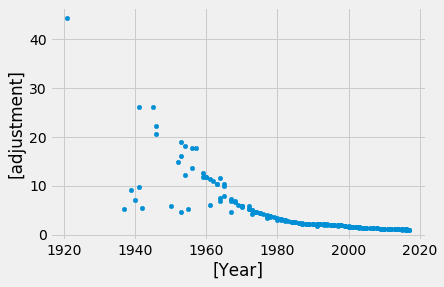

In [19]:
#movies.loc[:, ['Year', 'adjustment']].plot.scatter([])
movies.plot.scatter(['Year'], ['adjustment'])

In [20]:
movies.loc[:, 'Age'] = 2017 - movies.loc[:, 'Year']
movies.loc[:, 'Growth_rate'] = adjustment ** (1 / movies.loc[:, 'Age']) - 1
movies.head(5)

,Title,Studio,Gross,Gross (Adjusted),Year,adjustment,Age,Growth_rate
0,Gone with the Wind,MGM,198676459,1796176700,1939,9.040712,78,0.028630
1,Star Wars,Fox,460998007,1583483200,1977,3.434902,40,0.031330
2,The Sound of Music,Fox,158671368,1266072700,1965,7.979213,52,0.040748
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,2.898309,35,0.030871
4,Titanic,Paramount,658672302,1204368000,1997,1.828478,20,0.030634


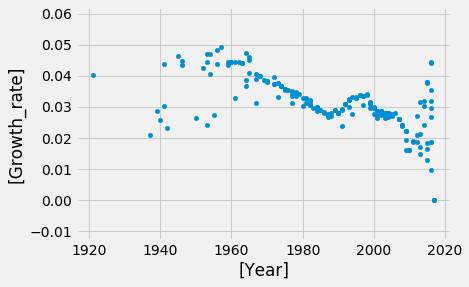

In [21]:
movies.plot.scatter(['Year'], ['Growth_rate'])